In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fire_img = glob.glob('/content/drive/My Drive/fire-detection/fire_dataset/fire_images/*.png')
non_fire_img = glob.glob('/content/drive/My Drive/fire-detection/fire_dataset/non_fire_images/*.png')

In [ ]:
print('Image dengan api : {}'.format(len(fire_img)))
print('Image tanpa api : {}'.format(len(non_fire_img)))

Image dengan api : 755
Image tanpa api : 244


In [ ]:
list_fire = []
for i in fire_img:
  list_fire.append([i,1]) #label 1 untuk fire
list_non_fire = []
for i in non_fire_img:
  list_non_fire.append([i,0]) #label 0 untuk non fire
list_all_img = list_fire + list_non_fire

In [ ]:
df = pd.DataFrame(list_all_img,columns = ['file','target'])

In [ ]:
df

,file,target
0,/content/drive/My Drive/fire-detection/fire_da...,1
1,/content/drive/My Drive/fire-detection/fire_da...,1
2,/content/drive/My Drive/fire-detection/fire_da...,1
3,/content/drive/My Drive/fire-detection/fire_da...,1
4,/content/drive/My Drive/fire-detection/fire_da...,1
...,...,...
994,/content/drive/My Drive/fire-detection/fire_da...,0
995,/content/drive/My Drive/fire-detection/fire_da...,0
996,/content/drive/My Drive/fire-detection/fire_da...,0
997,/content/drive/My Drive/fire-detection/fire_da...,0


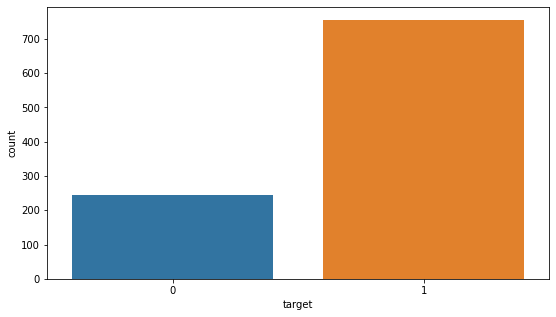

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(x = "target", data = df)
plt.show()

In [ ]:
df = df.sample(frac = 1, random_state = 42).reset_index(drop = True)

df

,file,target
0,/content/drive/My Drive/fire-detection/fire_da...,1
1,/content/drive/My Drive/fire-detection/fire_da...,0
2,/content/drive/My Drive/fire-detection/fire_da...,1
3,/content/drive/My Drive/fire-detection/fire_da...,1
4,/content/drive/My Drive/fire-detection/fire_da...,1
...,...,...
994,/content/drive/My Drive/fire-detection/fire_da...,1
995,/content/drive/My Drive/fire-detection/fire_da...,1
996,/content/drive/My Drive/fire-detection/fire_da...,0
997,/content/drive/My Drive/fire-detection/fire_da...,1


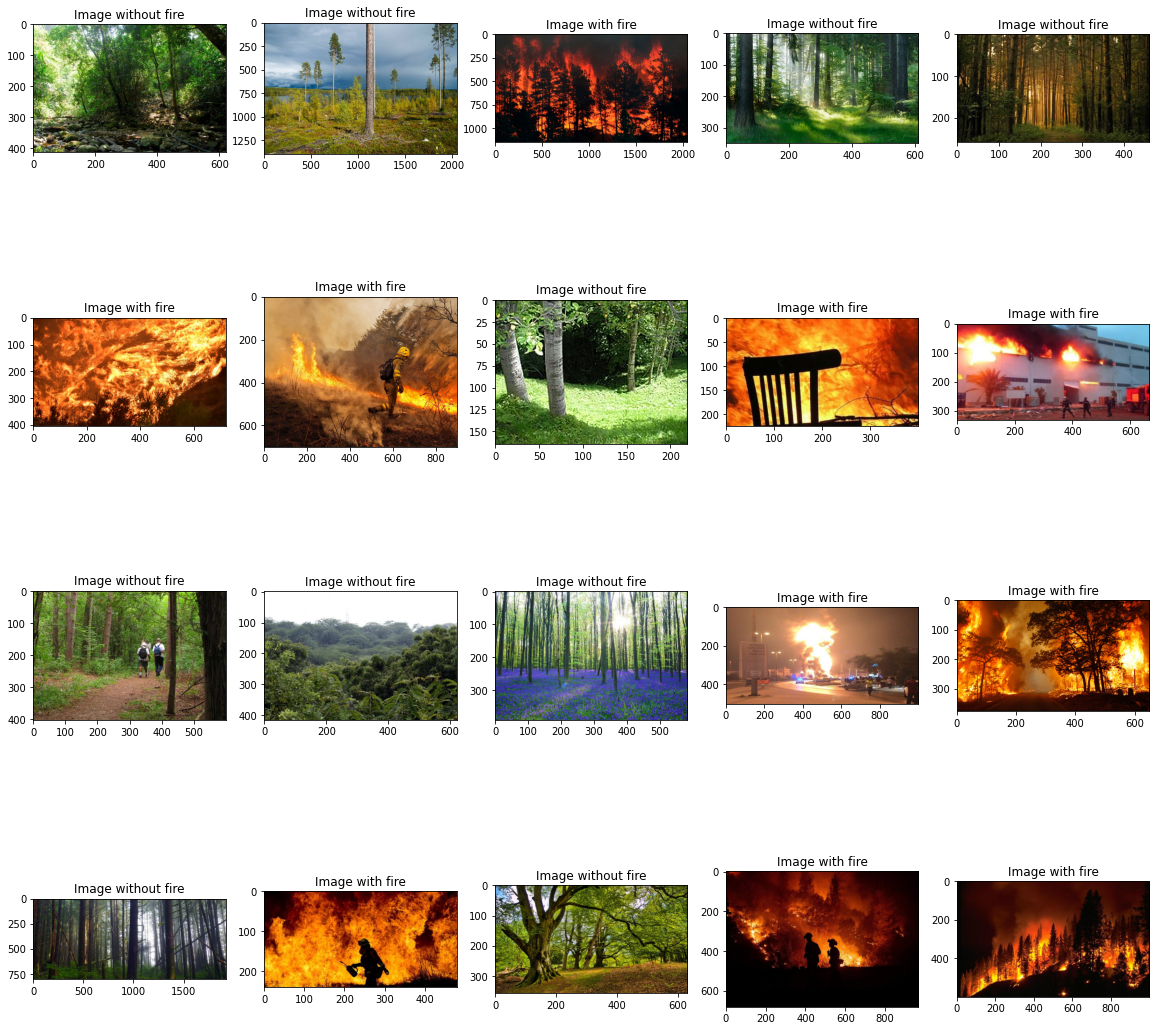

In [ ]:
list_images_random = random.sample(fire_img,10) + random.sample(non_fire_img,10)
random.shuffle(list_images_random)

plt.figure(figsize = (20,20))

for i in range(len(list_images_random)):
    
    plt.subplot(4,5,i+1)

    if 'non_fire' in list_images_random[i]:
        img = cv2.imread(list_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title('Image without fire')

    else:
        img = cv2.imread(list_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")

plt.show()

In [ ]:
filepath_img = '/content/drive/My Drive/fire-detection/fire_dataset/non_fire_images/non_fire.189.png'
df = df.loc[~(df.loc[:,'file'] == filepath_img),:]

In [ ]:
def preprocessing_image(filepath):
  img = cv2.imread(filepath) #read
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #convert
  img = cv2.resize(img,(250,250))  # resize
  img = img / 255 #scale
  return img 

def create_format_dataset(dataframe):
  X = []
  y = []
  for f,t in dataframe.values:
    X.append(preprocessing_image(f))
    y.append(t)
  return np.array(X),np.array(y)

X, y = create_format_dataset(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42, stratify = y)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((798, 250, 250, 3), (200, 250, 250, 3), (798,), (200,))

In [ ]:
CNN = Sequential()

CNN.add(Conv2D(16, (3, 3), input_shape = (250, 250, 3), activation = 'relu'))
CNN.add(MaxPooling2D(pool_size = (2, 2)))
CNN.add(Conv2D(32, (3, 3), activation = 'relu'))
CNN.add(MaxPooling2D(pool_size = (2, 2)))
CNN.add(Conv2D(64, (3, 3), activation = 'relu'))
CNN.add(MaxPooling2D(pool_size = (2, 2)))
CNN.add(Dropout(0.2))
CNN.add(Conv2D(128, (3, 3), activation = 'relu'))
CNN.add(MaxPooling2D(pool_size = (2, 2)))
CNN.add(Dropout(0.2))
CNN.add(Flatten())
CNN.add(Dense(units = 512, activation = 'relu'))
CNN.add(Dropout(0.2))
CNN.add(Dense(units = 1, activation = 'sigmoid'))

# Callbacks
callbacks = [EarlyStopping(monitor = 'loss', mode = 'min', patience = 20, restore_best_weights = True)]

print(CNN.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

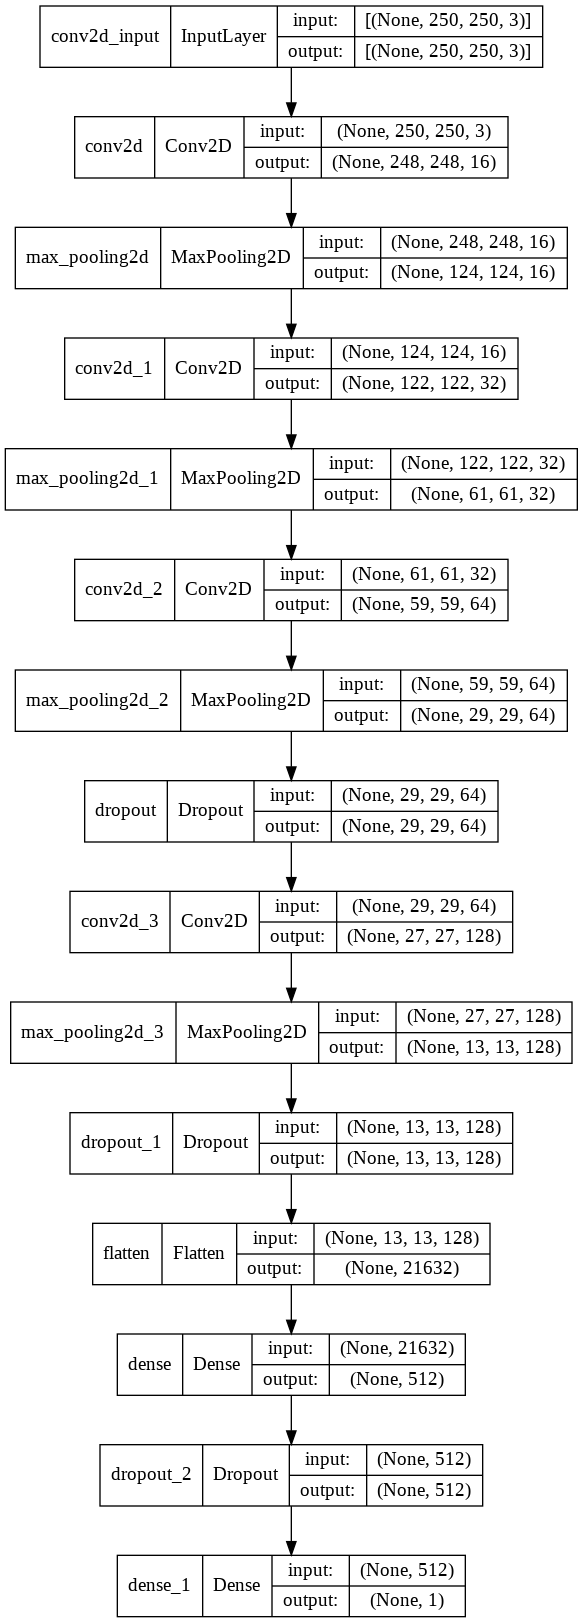

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(CNN, to_file='CNN_model.png', show_layer_names = True , show_shapes = True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.1,  
    shear_range=0.2,
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=False,  
    vertical_flip=False 
) 

In [ ]:
datagen.fit(X_train)

In [ ]:
CNN.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
CNN_model = CNN.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
25/25 [==============================] - 34s 133ms/step - loss: 0.6097 - accuracy: 0.8083 - val_loss: 0.2230 - val_accuracy: 0.9050
Epoch 2/20
25/25 [==============================] - 2s 90ms/step - loss: 0.1885 - accuracy: 0.9298 - val_loss: 0.1268 - val_accuracy: 0.9700
Epoch 3/20
25/25 [==============================] - 2s 91ms/step - loss: 0.1093 - accuracy: 0.9574 - val_loss: 0.1017 - val_accuracy: 0.9650
Epoch 4/20
25/25 [==============================] - 2s 91ms/step - loss: 0.1221 - accuracy: 0.9511 - val_loss: 0.1077 - val_accuracy: 0.9650
Epoch 5/20
25/25 [==============================] - 2s 90ms/step - loss: 0.1191 - accuracy: 0.9524 - val_loss: 0.1112 - val_accuracy: 0.9500
Epoch 6/20
25/25 [==============================] - 2s 91ms/step - loss: 0.0978 - accuracy: 0.9637 - val_loss: 0.0959 - val_accuracy: 0.9550
Epoch 7/20
25/25 [==============================] - 2s 89ms/step - loss: 0.0743 - accuracy: 0.9662 - val_loss: 0.0884 - val_accuracy: 0.9750
Epoch 8/20


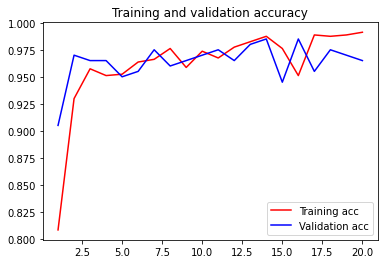

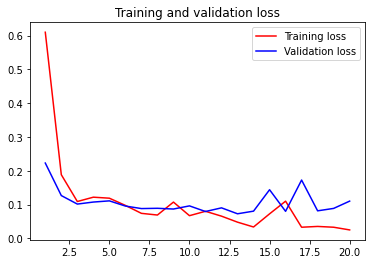

In [ ]:
acc = CNN_model.history['accuracy']
val_acc = CNN_model.history['val_accuracy']
loss = CNN_model.history['loss']
val_loss = CNN_model.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
y_pred = CNN.predict(X_test)

In [ ]:
y_pred

array([[1.00000000e+00],
       [7.02944060e-04],
       [1.00000000e+00],
       [8.10474336e-01],
       [9.94419277e-01],
       [9.98727381e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.90620039e-04],
       [1.68569863e-01],
       [3.59674878e-02],
       [1.00000000e+00],
       [3.13899433e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [3.83560837e-05],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.76854110e-01],
       [3.56120206e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.54742179e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.63098598e-01],
       [9.99999642e-01],
       [2.28541554e-04],
       [9.98051167e-01],
       [1.00000000e+00],
       [5.31319762e-03],
       [1.38719305e-02],
       [8.48148484e-03],


In [ ]:
y_pred = y_pred.reshape(-1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
y_pred = y_pred.astype('int')

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

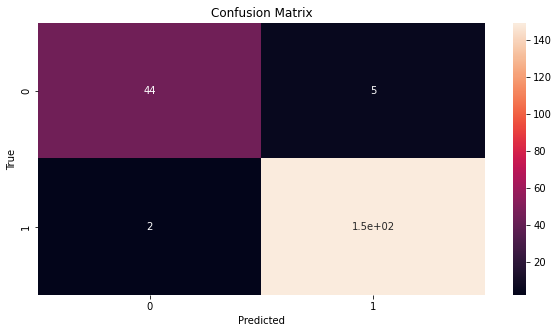

In [ ]:
plt.figure(figsize = (10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        49
           1       0.97      0.99      0.98       151

    accuracy                           0.96       200
   macro avg       0.96      0.94      0.95       200
weighted avg       0.96      0.96      0.96       200

